# Find solns VMCON factor

Using VMCON with `factor = 1.5`, 19 solutions were found. Are they all the same?

In [2]:
# Reload Process each time (keep editable install up-to-date)
%load_ext autoreload
%autoreload 2

from pathlib import Path
from process.io import plot_solutions as ps

,tag,objf_name,norm_objf,itvar001_name,xcm001,itvar002_name,xcm002,itvar003_name,xcm003,itvar004_name,...,itvar043_name,xcm043,itvar044_name,xcm044,itvar045_name,xcm045,itvar046_name,xcm046,itvar047_name,xcm047
0,sol_0,net electrical output,-1.4022,bt,0.90935,rmajor,1.45340,te,0.99118,beta,...,fimp(13),2.1581,dr_tf_wp,1.08780,fgwped,0.76213,fbmaxcs,5.12020,fne0,0.88122
1,sol_1,net electrical output,-1.4022,bt,0.94369,rmajor,1.58070,te,1.04630,beta,...,fimp(13),2.1581,dr_tf_wp,1.02460,fgwped,1.34010,fbmaxcs,0.89771,fne0,0.77884
2,sol_2,net electrical output,-1.4022,bt,1.06240,rmajor,1.16200,te,1.56470,beta,...,fimp(13),2.1581,dr_tf_wp,0.81623,fgwped,0.73467,fbmaxcs,1.39170,fne0,0.65298
3,sol_3,net electrical output,-1.4022,bt,0.87370,rmajor,0.82305,te,1.42390,beta,...,fimp(13),2.1581,dr_tf_wp,0.83651,fgwped,0.88820,fbmaxcs,0.74851,fne0,1.58570
4,sol_4,net electrical output,-1.4022,bt,0.95331,rmajor,0.94734,te,1.66030,beta,...,fimp(13),2.1581,dr_tf_wp,0.88858,fgwped,0.96065,fbmaxcs,1.48490,fne0,0.54783
5,sol_5,net electrical output,-1.4025,bt,0.61536,rmajor,1.10520,te,0.93800,beta,...,fimp(13),2.1605,dr_tf_wp,1.01930,fgwped,1.39090,fbmaxcs,176.03000,fne0,9.03280
6,sol_6,net electrical output,-1.4025,bt,0.84645,rmajor,1.58210,te,1.16910,beta,...,fimp(13),2.1605,dr_tf_wp,1.43980,fgwped,1.32390,fbmaxcs,1.01620,fne0,1.82950
7,sol_7,net electrical output,-1.4022,bt,0.75261,rmajor,1.16970,te,0.84734,beta,...,fimp(13),2.1581,dr_tf_wp,0.90212,fgwped,1.33860,fbmaxcs,0.91037,fne0,1.60320
8,sol_8,net electrical output,-1.4025,bt,0.88986,rmajor,1.34270,te,0.80234,beta,...,fimp(13),2.1602,dr_tf_wp,0.69432,fgwped,0.97006,fbmaxcs,0.81406,fne0,2.89040
9,sol_9,net electrical output,-1.4022,bt,0.86824,rmajor,1.06070,te,0.97928,beta,...,fimp(13),2.1581,dr_tf_wp,0.81454,fgwped,0.98023,fbmaxcs,0.80841,fne0,8.43260


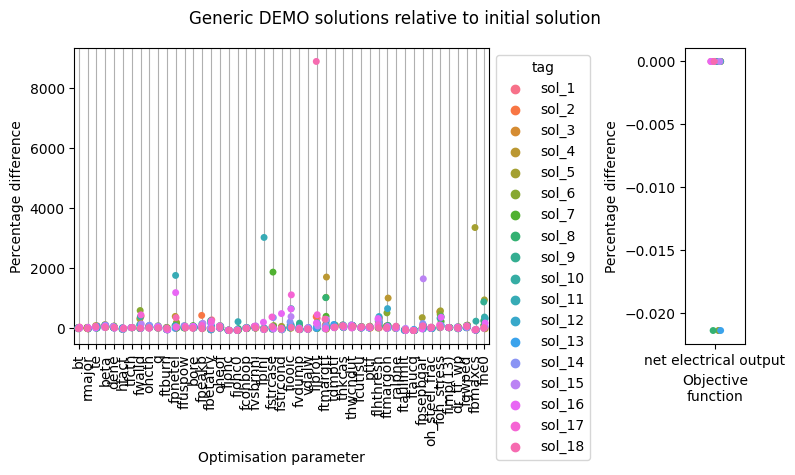

In [3]:
# Plot all solutions
data_dir = Path("data")
soln_files = list(data_dir.glob("*MFILE.DAT"))

# Order by number
soln_files = sorted(
    soln_files, key=lambda s: int(s.stem.removesuffix("_MFILE").removeprefix("sol_"))
)

runs_metadata = []
for soln_file in soln_files:
    soln_name = soln_file.stem.removesuffix("_MFILE")
    runs_metadata.append(ps.RunMetadata(soln_file, soln_name))

ps.plot_mfile_solutions(
    runs_metadata,
    "Generic DEMO solutions relative to initial solution",
    percentage=True,
    relative_tag="sol_0",
)

Whilst the objective functions are very similar, the optmisation parameters appear to vary quite a bit. f-values only reflect how close to a constraint we are, to balance an equality constraint that's really an inequality constraint, so try dropping these from the plot.

,tag,objf_name,norm_objf,itvar001_name,xcm001,itvar002_name,xcm002,itvar003_name,xcm003,itvar004_name,...,itvar043_name,xcm043,itvar044_name,xcm044,itvar045_name,xcm045,itvar046_name,xcm046,itvar047_name,xcm047
0,sol_0,net electrical output,-1.4022,bt,0.90935,rmajor,1.45340,te,0.99118,beta,...,fimp(13),2.1581,dr_tf_wp,1.08780,fgwped,0.76213,fbmaxcs,5.12020,fne0,0.88122
1,sol_1,net electrical output,-1.4022,bt,0.94369,rmajor,1.58070,te,1.04630,beta,...,fimp(13),2.1581,dr_tf_wp,1.02460,fgwped,1.34010,fbmaxcs,0.89771,fne0,0.77884
2,sol_2,net electrical output,-1.4022,bt,1.06240,rmajor,1.16200,te,1.56470,beta,...,fimp(13),2.1581,dr_tf_wp,0.81623,fgwped,0.73467,fbmaxcs,1.39170,fne0,0.65298
3,sol_3,net electrical output,-1.4022,bt,0.87370,rmajor,0.82305,te,1.42390,beta,...,fimp(13),2.1581,dr_tf_wp,0.83651,fgwped,0.88820,fbmaxcs,0.74851,fne0,1.58570
4,sol_4,net electrical output,-1.4022,bt,0.95331,rmajor,0.94734,te,1.66030,beta,...,fimp(13),2.1581,dr_tf_wp,0.88858,fgwped,0.96065,fbmaxcs,1.48490,fne0,0.54783
5,sol_5,net electrical output,-1.4025,bt,0.61536,rmajor,1.10520,te,0.93800,beta,...,fimp(13),2.1605,dr_tf_wp,1.01930,fgwped,1.39090,fbmaxcs,176.03000,fne0,9.03280
6,sol_6,net electrical output,-1.4025,bt,0.84645,rmajor,1.58210,te,1.16910,beta,...,fimp(13),2.1605,dr_tf_wp,1.43980,fgwped,1.32390,fbmaxcs,1.01620,fne0,1.82950
7,sol_7,net electrical output,-1.4022,bt,0.75261,rmajor,1.16970,te,0.84734,beta,...,fimp(13),2.1581,dr_tf_wp,0.90212,fgwped,1.33860,fbmaxcs,0.91037,fne0,1.60320
8,sol_8,net electrical output,-1.4025,bt,0.88986,rmajor,1.34270,te,0.80234,beta,...,fimp(13),2.1602,dr_tf_wp,0.69432,fgwped,0.97006,fbmaxcs,0.81406,fne0,2.89040
9,sol_9,net electrical output,-1.4022,bt,0.86824,rmajor,1.06070,te,0.97928,beta,...,fimp(13),2.1581,dr_tf_wp,0.81454,fgwped,0.98023,fbmaxcs,0.80841,fne0,8.43260


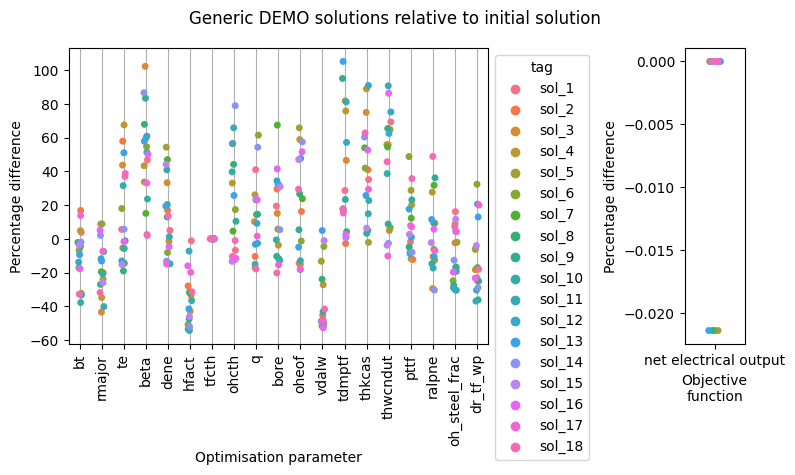

In [4]:
ps.plot_mfile_solutions(
    runs_metadata,
    "Generic DEMO solutions relative to initial solution",
    percentage=True,
    relative_tag="sol_0",
    drop_f_values=True,
)

**CAREFUL!** This looks like different points due to using `xcm` (final/initial) values, which depend on the initial points, which are different for each run. Need to compare `itvar` vars to see if actual solutions are different.

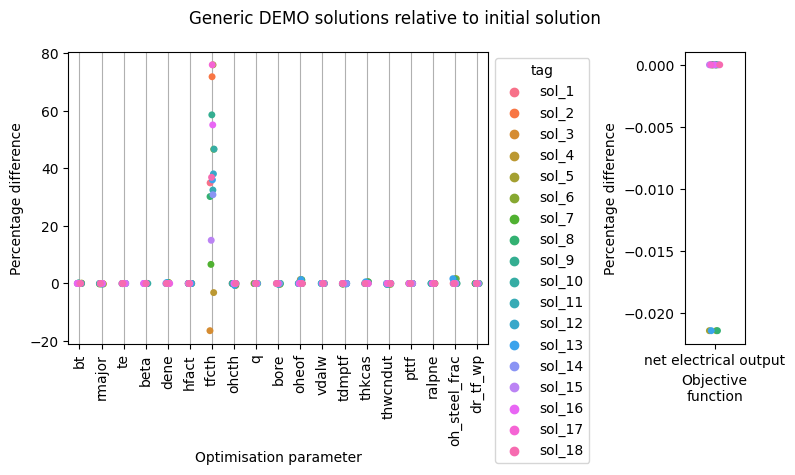

In [5]:
abs_solns =ps.plot_mfile_solutions(
    runs_metadata,
    "Generic DEMO solutions relative to initial solution",
    percentage=True,
    relative_tag="sol_0",
    drop_f_values=True,
    plot_itvars=True,
)

`tfcth` shows considerable variation (itvar007). This is the TF coil inboard leg (m).

In [6]:
abs_solns["itvar007"].describe()

count    19.000000
mean      1.593294
std       0.310425
min       0.984080
25%       1.442950
50%       1.600500
75%       1.775700
max       2.070900
Name: itvar007, dtype: float64

Some of the iteration variables begin with an f! Not just f-values... Need to fix this bug, as currently some iteration vars are being filtered out.

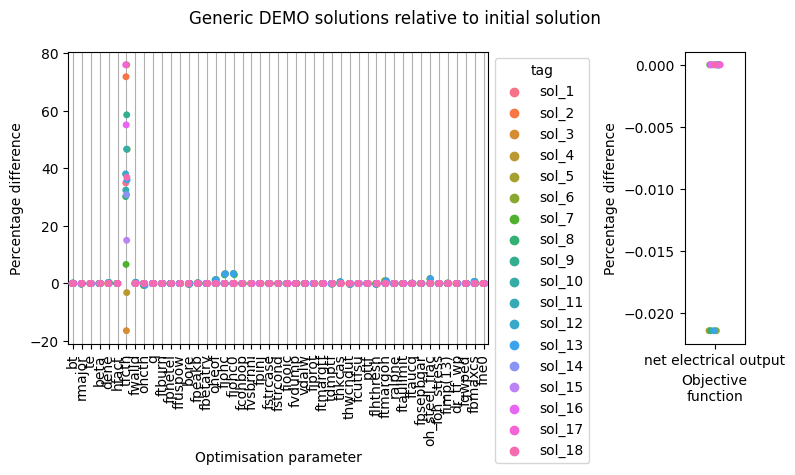

In [7]:
abs_solns =ps.plot_mfile_solutions(
    runs_metadata,
    "Generic DEMO solutions relative to initial solution",
    percentage=True,
    relative_tag="sol_0",
    drop_f_values=False,
    plot_itvars=True,
)

tfcth is the main difference between the solutions, still.

## Factor = 2

Set factor to 2, found a slightly higher value of tfcth, but nothing else different. Appears to be a similar solution.

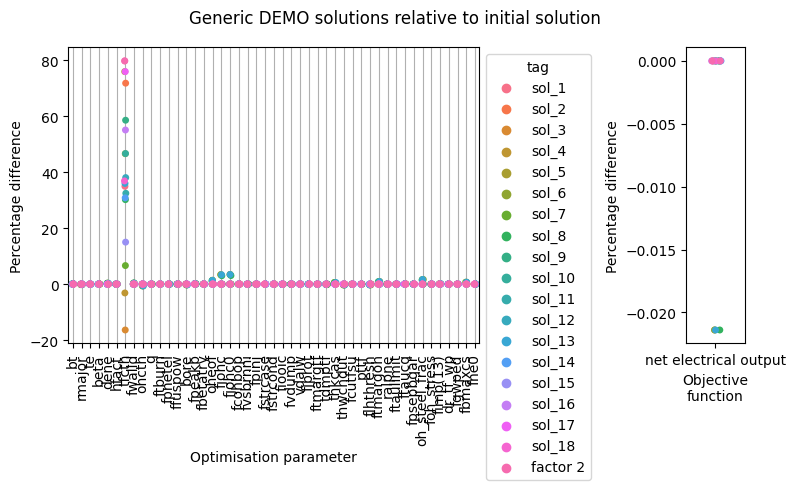

In [9]:
# Add in factor 2 soln
factor_2_path = Path("factor_2_sol_0_MFILE.DAT")
runs_metadata.append(ps.RunMetadata(factor_2_path, "factor 2"))

abs_solns = ps.plot_mfile_solutions(
    runs_metadata,
    "Generic DEMO solutions relative to initial solution",
    percentage=True,
    relative_tag="sol_0",
    drop_f_values=False,
    plot_itvars=True,
)

In [10]:
abs_solns

,tag,objf_name,norm_objf,itvar001_name,itvar001,itvar002_name,itvar002,itvar003_name,itvar003,itvar004_name,...,itvar043_name,itvar043,itvar044_name,itvar044,itvar045_name,itvar045,itvar046_name,itvar046,itvar047_name,itvar047
0,sol_0,net electrical output,-1.4022,bt,4.7251,rmajor,9.6153,te,14.542,beta,...,fimp(13),0.000820,dr_tf_wp,0.5,fgwped,0.72,fbmaxcs,0.73763,fne0,0.48113
1,sol_1,net electrical output,-1.4022,bt,4.7251,rmajor,9.6153,te,14.542,beta,...,fimp(13),0.000820,dr_tf_wp,0.5,fgwped,0.72,fbmaxcs,0.73763,fne0,0.48113
2,sol_2,net electrical output,-1.4022,bt,4.7251,rmajor,9.6153,te,14.542,beta,...,fimp(13),0.000820,dr_tf_wp,0.5,fgwped,0.72,fbmaxcs,0.73763,fne0,0.48113
3,sol_3,net electrical output,-1.4022,bt,4.7251,rmajor,9.6153,te,14.542,beta,...,fimp(13),0.000820,dr_tf_wp,0.5,fgwped,0.72,fbmaxcs,0.73763,fne0,0.48113
4,sol_4,net electrical output,-1.4022,bt,4.7251,rmajor,9.6153,te,14.542,beta,...,fimp(13),0.000820,dr_tf_wp,0.5,fgwped,0.72,fbmaxcs,0.73763,fne0,0.48113
5,sol_5,net electrical output,-1.4025,bt,4.7309,rmajor,9.5970,te,14.535,beta,...,fimp(13),0.000821,dr_tf_wp,0.5,fgwped,0.72,fbmaxcs,0.74260,fne0,0.48113
6,sol_6,net electrical output,-1.4025,bt,4.7309,rmajor,9.5970,te,14.535,beta,...,fimp(13),0.000821,dr_tf_wp,0.5,fgwped,0.72,fbmaxcs,0.74260,fne0,0.48113
7,sol_7,net electrical output,-1.4022,bt,4.7251,rmajor,9.6153,te,14.542,beta,...,fimp(13),0.000820,dr_tf_wp,0.5,fgwped,0.72,fbmaxcs,0.73763,fne0,0.48113
8,sol_8,net electrical output,-1.4025,bt,4.7303,rmajor,9.5989,te,14.536,beta,...,fimp(13),0.000821,dr_tf_wp,0.5,fgwped,0.72,fbmaxcs,0.74213,fne0,0.48113
9,sol_9,net electrical output,-1.4022,bt,4.7251,rmajor,9.6153,te,14.542,beta,...,fimp(13),0.000820,dr_tf_wp,0.5,fgwped,0.72,fbmaxcs,0.73763,fne0,0.48113
